# INTRODUCCIÓN
* En este Notebook aprenderemos a utilizar la librería plotly.
    * Plotly: Es una biblioteca de gráficos Python para hacer gráficos interactivos en línea con calidad de publicación. Ejemplos: gráficos de líneas, gráficos de dispersión, gráficos de área, gráficos de barras, barras de error, gráficos de caja, histogramas, mapas de calor, subparcelas, ejes múltiples, gráficos polares y gráficos de burbujas.

<br>Contenido:
1. [Loading Data and Explanation of Features](#1)
1. [Line Charts](#2)
1. [Scatter Charts](#3)
1. [Bar Charts](#4)
1. [Pie Charts](#5)
1. [Bubble Charts](#6)
1. [Histogram](#7)
1. [Word Cloud](#8)
1. [Box Plot](#9)
1. [Scatter Plot Matrix](#10)
1. Map Plots: https://www.kaggle.com/kanncaa1/time-series-prediction-with-eda-of-world-war-2
1. Data Visualization
    1. Seaborn: https://www.kaggle.com/kanncaa1/seaborn-for-beginners
    1. Bokeh 1: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-1
    1. Bokeh 2: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-
    1. Rare Visualization: https://www.kaggle.com/kanncaa1/rare-visualization-tools
1. [Inset Plots](#11)
1. [3D Scatter Plot with Colorscaling](#12)
1. [Multiple Subplots](#13)
1. Earthquake Animation: https://www.kaggle.com/kanncaa1/earthquake-animation-with-plotly



In [ ]:
# !pip install plotly
# !pip install wordcloud

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

<a id="1"></a> <br>
# Carga de datos y explicación de funciones
<font color='red'>
* timesData incluye 14 funciones que son:
    <font color='black'>
        
    * world_rank             
    * university_name       
    * country               
    * teaching                
    * international            
    * research                 
    * citations                
    * income                   
    * total_score              
    * num_students             
    * student_staff_ratio      
    * international_students   
    * female_male_ratio        
    * year 

In [2]:
# Cargar los datos que vamos a utilizar.
timesData = pd.read_csv("https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv")

In [ ]:
# información sobre timesData
timesData.info()

In [ ]:
timesData.head(10)

In [ ]:
timesData['year'].unique()

<a id="2"></a> <br>
# Line Charts
Ejemplo de gráficos de líneas: Citas y enseñanza frente a la clasificación mundial de las 100 mejores universidades
* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
    * title = title of layout
    * x axis = it is dictionary
        * title = label of x axis
        * ticklen = length of x axis ticks
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [24]:
# preparacion del dataframe
# 100 mejores universidad, 100 primeras
df = timesData.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Crear traza1
trace1 = go.Scatter(
                    x = df['world_rank'],
                    y = df['citations'],
                    name = 'citations',
                    mode= 'lines',
                    marker = dict(color = 'green'),
                    text = df['university_name'])

# Creando traza2
trace2 = go.Scatter(
                    x = df['world_rank'],
                    y = df['teaching'],
                    name = 'teaching',
                    mode= 'lines+markers',
                    marker = dict(color = 'purple'),
                    text = df['university_name'])

data = [trace1, trace2]

layout = dict(title = 'Citas y enseñanza frente a la clasificación mundial de las 100 mejores universidades',
             xaxis= dict(title= 'Clasificación mundial',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

<a id="3"></a> <br>
# Scatter
Ejemplo de dispersión: Citación frente al ranking mundial de las 100 mejores universidades con los años 2014, 2015 y 2016
* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
    * title = title of layout
    * x axis = it is dictionary
        * title = label of x axis
        * ticklen = length of x axis ticks
        * zeroline = showing zero line or not
    * y axis = it is dictionary and same with x axis
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [32]:
# preparacion de los dataframes
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
df2016['world_rank'] = df2016['world_rank'].str.replace('=','')

df2014['world_rank'] = df2014['world_rank'].astype(int)
df2015['world_rank'] = df2015['world_rank'].astype(int)
df2016['world_rank'] = df2016['world_rank'].astype(int)


# import graph objects as "go"
import plotly.graph_objs as go

# creando traza1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
# creating traza2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# creating traza3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)

data = [trace1, trace2, trace3]

layout = dict(title = 'Citación frente a la clasificación mundial de las 100 mejores universidades con los años 2014, 2015 y 2016',
              xaxis= dict(title= 'Clasificación mundial',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Cita',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)
# fig = go.Figure(data = data, layout=layout)

iplot(fig)

<a id="4"></a> <br>
# Bar Charts
Primer ejemplo de gráfico de barras: citas y docencia de las 3 primeras universidades en 2014 (estilo1)
* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
        * line = It is dictionary. line between bars
            * color = line color around bars
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
    * barmode = bar mode of bars like grouped
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [27]:
# preparacion del dataframe
df2014 = timesData[timesData.year == 2014].iloc[:3,:]

# import graph objects as "go"
import plotly.graph_objs as go

# crear traza1
trace1 = go.Bar(x = df2014['university_name'],
               y = df2014['citations'],
               name = 'citations',
               marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = df2014['country'])

trace2 = go.Bar(x = df2014['university_name'],
               y = df2014['teaching'],
               name = 'teaching',
               marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = df2014['country'])



data = [trace1, trace2]

layout = go.Layout(barmode = "group")

fig = go.Figure(data = data, layout = layout)

iplot(fig)

Segundo ejemplo de gráfico de barras: citas y enseñanza de las 3 mejores universidades en 2014 (style2)

En realidad, si cambias sólo el barmode de *grupo* a *relativo* en el ejemplo anterior, consigues lo que hicimos aquí. Sin embargo, por diversidad uso sintaxis diferentes. 
* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * name = name of the plots
    * type = type of plot like bar plot
* data = is a list that we add traces into it
* layout = it is dictionary.
    * xaxis = label of x axis
    * barmode = bar mode of bars like grouped( previous example) or relative
    * title = title of layout
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [33]:
# preparacion dataframe
df2014 = timesData[timesData.year == 2014].iloc[:3,:]

# import graph objects as "go"
import plotly.graph_objs as go

x = df2014.university_name

trace1 = {
    'x': x,
    'y': df2014['citations'],
    'name': 'citation',
    'type': 'bar'
}

trace2 = {
    'x': x,
    'y': df2014['teaching'],
    'name': 'teaching',
    'type': 'bar'
}

data = [trace1, trace2]

layout = {
    'xaxis': {'title': 'Top 3 unis'},
    'barmode': 'group',
    'title': 'Citas y enseñanza top 3 unis'
}

fig = go.Figure(data = data, layout = layout)
iplot(fig)

<a id="5"></a> <br>
# Pie Charts
Ejemplo de gráficos circulares: Valoración de los estudiantes de las 7 mejores universidades en 2016
* fig: create figures
    * data: plot type
        * values: values of plot
        * labels: labels of plot
        * name: name of plots
        * hoverinfo: information in hover
        * hole: hole width
        * type: plot type like pie
    * layout: layout of plot
        * title: title of layout
        * annotations: font, showarrow, text, x, y

In [34]:
# preparacion de la data
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [int(each.replace(',', '')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name

# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Número de estudiantes Tarifas",
      "hoverinfo":"label+percent+name",
      "hole": 0.3,
      "type": "pie"
    },],
  "layout": {
        "title":"Universidades Número de estudiantes",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Número de alumnos",
                "x": 0.13,
                "y": 1.1
            },
        ]
    }
}
iplot(fig)

<a id="6"></a> <br>
# Bubble Charts
Ejemplo de gráficos de burbujas: Ranking mundial de universidades (20 primeras) vs puntuación docente con número de alumnos(tamaño) y puntuación internacional (color) en 2016
* x = x axis
* y = y axis
* mode = markers(scatter)
*  marker = marker properties
    * color = third dimension of plot. Internaltional score
    * size = fourth dimension of plot. Number of students
* text: university names

In [ ]:
df2016.info()

In [35]:
num_students_size  = [int(each.replace(',', ''))/1000 for each in df2016.num_students]
# num_students_size

In [36]:
# preparacion de la data
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size  = [int(each.replace(',', ''))/1000 for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]

data = [
    {
        'y': df2016['teaching'],
        'x': df2016['world_rank'],
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        'text': df2016['university_name']
    }
]

iplot(data)

<a id="7"></a> <br>
# Histogram
Veamos el histograma de la relación alumnos/personal en los años 2011 y 2012. 
* trace1 = first histogram
    * x = x axis
    * y = y axis
    * opacity = opacity of histogram
    * name = name of legend
    * marker = color of histogram
* trace2 = second histogram
* layout = layout 
    * barmode = mode of histogram like overlay. Also you can change it with *stack*

In [37]:
# preparacion de la data
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]
x2013 = timesData.student_staff_ratio[timesData.year == 2013]

trace1 = go.Histogram(x = x2011,
                     opacity = 0.9,
                     name = '2011',
                     marker = dict(color = 'rgba(171,50,96,0.6)'))

trace2 = go.Histogram(x = x2012,
                     opacity = 0.9,
                     name = '2012',
                     marker = dict(color = 'rgba(12,50,196,0.6)'))

trace3 = go.Histogram(x = x2013,
                     opacity = 0.9,
                     name = '2013',
                     marker = dict(color = 'rgba(80,90,196,0.6)'))

data = [trace1, trace2, trace3]
layout = go.Layout(barmode='overlay',
                   title=' ratio alumnos-personal en 2011 y 2012',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="8"></a> <br>
# Word Cloud
No es un pyplot pero aprenderlo es bueno para la visualización. Veamos cuál es el país más mencionado en 2011.
* WordCloud = word cloud library that I import at the beginning of kernel
    * background_color = color of back ground
    * generate = generates the country name list(x2011) a word cloud

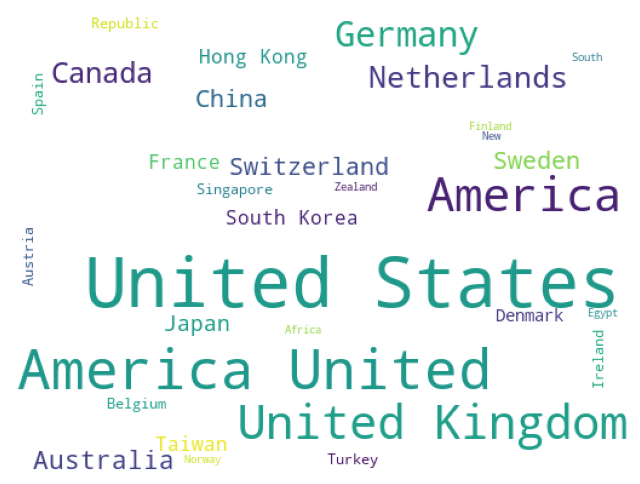

In [38]:
# preparacion de la data
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

<a id="9"></a> <br>
# Box Plots
* Box Plots
    * Mediana (percentil 50) = valor medio del conjunto de datos. Ordenar y tomar los datos en el medio. También se denomina percentil 50%, es decir, el 50% de los datos son inferiores a la mediana (cuartil 50) (cuartil).
        * 25th percentile = quartile 1 (Q1) that is lower quartile
        * 75th percentile = quartile 3 (Q3) that is higher quartile
        * height of box = IQR = interquartile range = Q3-Q1
        * Whiskers = 1.5 * IQR from the Q1 and Q3
        * Outliers = being more than 1.5*IQR away from median commonly.
        
    * trace = box
        * y = data we want to visualize with box plot 
        * marker = color

In [39]:
# preparacion de la data
x2015 = timesData[timesData.year == 2015]
x2015['total_score'].unique()

array(['94.3', '93.3', '93.2', '92.9', '92.0', '91.9', '90.9', '89.5',
       '87.5', '87.1', '85.5', '84.6', '84.4', '83.0', '81.0', '80.9',
       '79.9', '79.4', '79.3', '79.2', '78.7', '76.1', '74.3', '73.3',
       '73.2', '72.8', '72.3', '71.9', '71.8', '71.2', '70.9', '70.4',
       '70.0', '69.9', '69.6', '69.4', '68.6', '67.8', '67.5', '66.8',
       '66.5', '65.9', '65.2', '65.1', '64.8', '64.7', '64.5', '64.1',
       '63.7', '63.6', '62.9', '62.8', '62.7', '62.2', '61.9', '61.3',
       '61.2', '61.1', '61.0', '60.7', '59.8', '59.6', '59.2', '59.1',
       '59.0', '58.9', '58.4', '58.2', '58.1', '58.0', '57.9', '57.6',
       '57.3', '56.9', '56.6', '56.5', '56.4', '56.2', '56.1', '55.5',
       '55.3', '55.2', '55.1', '54.6', '54.3', '54.0', '53.9', '53.8',
       '53.7', '53.6', '53.4', '53.2', '53.1', '53.0', '52.9', '52.8',
       '52.7', '52.6', '52.5', '52.4', '52.1', '52.0', '51.9', '51.6',
       '51.4', '51.2', '51.1', '51.0', '50.9', '50.5', '50.4', '50.3',
      

In [40]:
x2015['total_score'] = x2015['total_score'].str.replace('-','0')
x2015['total_score'] = x2015['total_score'].astype(float)
x2015.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score               float64
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [41]:
trace0 = go.Box(y = x2015['total_score'],
                name = 'Puntuación total en 2015',
               marker = dict(color = 'rgb(12,12,140)'))

trace1 = go.Box(y = x2015['research'],
                name = 'Investigación total en 2015',
               marker = dict(color = 'rgb(12,128,128)'))


data = [trace0, trace1]
iplot(data)

<a id="10"></a> <br>
# Scatter Matrix Plots
Matriz de dispersión = nos ayuda a ver la covarianza y la relación entre más de 2 características.
* import figure factory as ff
* create_scatterplotmatrix = creates scatter plot
    * data2015 = prepared data. It includes research, international and total scores with index from 1 to 401
    * colormap = color map of scatter plot
    * colormap_type = color type of scatter plot
    * height and weight

In [42]:
# import figure factory
import plotly.figure_factory as ff

# preparacion de la data
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)

data2015['international'] = data2015['international'].str.replace('-','0')
data2015['total_score'] = data2015['total_score'].str.replace('-','0')
data2015['international'] = data2015['international'].astype(float)
data2015['total_score'] = data2015['total_score'].astype(float)

# scatter matrix
fig = ff.create_scatterplotmatrix(data2015,
                                 diag = 'box',
                                 index ='index',
                                 colormap = 'Portland',
                                 height = 700,
                                 width = 700)

iplot(fig)

<a id="11"></a> <br>
# Inset Plots
<font color='red'>
Matriz de inserción = 2 parcelas en un fotograma
<font color='black'>

In [43]:
# primer line plot
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "enseñanza",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)

# segundo line plot
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "ingresos",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]

layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Ingresos y enseñanza frente a la clasificación mundial de universidades'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


<a id="12"></a> <br>
# 3D Scatter Plot with Colorscaling
Dispersión 3D: A veces 2D no es suficiente para entender los datos. Por lo tanto, añadir una dimensión más aumenta la inteligibilidad de los datos. Incluso añadiremos color, que en realidad es la cuarta dimensión.
* go.Scatter3d: create 3d scatter plot
* x,y,z: axis of plots
* mode: market that is scatter
* size: marker size
* color: axis of colorscale
* colorscale:  actually it is 4th dimension

In [44]:
# crear traza 1 que es dispersión 3d
trace1 = go.Scatter3d(x = dataframe['world_rank'],
                     y = dataframe['research'],
                     z = dataframe['citations'],
                     mode = 'markers',
                     marker = dict(size = 5, color = 'rgb(255,0,0)'))

data = [trace1]
layout = go.Layout()

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="13"></a> <br>
# Multiple Subplots
<font color='red'>
Subparcelas múltiples: A la hora de comparar más de una característica, pueden ser útiles múltiples subparcelas.
<font color='black'>



In [45]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    xaxis='x1',
    yaxis='y1',
    name = "investigación"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citas"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "ingresos"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "puntuación_total"
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45],
        anchor='y1'
    ),
    yaxis=dict(
        domain=[0, 0.45],
        anchor='x1'
    ),
    xaxis2=dict(
        domain=[0.55, 1],
        anchor='y2'
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1],
        anchor='x3'
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Investigación, citas, ingresos y puntuación total VS Clasificación mundial de universidades'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Export to HTML
Las figuras de Plotly son interactivas cuando se visualizan en un navegador web: puede pasar el ratón por encima de los puntos de datos, desplazar y ampliar los ejes, y mostrar y ocultar trazas haciendo clic o doble clic en la leyenda. Las figuras pueden exportarse a formatos de imagen estáticos como PNG, JEPG, SVG o PDF, o bien a archivos HTML que pueden abrirse en un navegador. En esta página se explica cómo hacerlo.


In [46]:
# fig es el último objeto fig ejecutado en el cuaderno
fig.write_html("4 charts in one.html")

In [47]:
df['country'].unique()

array(['United States of America', 'United Kingdom', 'Switzerland',
       'Canada', 'Hong Kong', 'Japan', 'South Korea', 'Singapore',
       'Australia', 'China', 'France', 'Sweden', 'Germany',
       'Republic of Ireland'], dtype=object)

In [48]:
import plotly.express as px
df = px.data.gapminder().query("year==2007")
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     projection="natural earth")
fig.show()